In [13]:
import pandas as pd

filepath = './data/cleaned/consumption_temp_w_features.csv'
df = pd.read_csv(filepath)

display(df.head())


,time,location,consumption,temperature,date,is_holiday,weekday,hour_of_day,consumption_lag_last_week,consumption_lag_5_days,season,temperature_diff_prev_day,consumption_ma_week,consumption_max_week,consumption_min_week,consumption_ewm_alpha_0.5
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,1.113325
1,2022-04-07 21:00:00,oslo,4.092830,1.0,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,4.092830
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,2.057858
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,1.246582
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,1.970098


In [14]:
# Convert 'time' to Pandas Timestamp
df['time'] = pd.to_datetime(df['time'])
display(df.head())


,time,location,consumption,temperature,date,is_holiday,weekday,hour_of_day,consumption_lag_last_week,consumption_lag_5_days,season,temperature_diff_prev_day,consumption_ma_week,consumption_max_week,consumption_min_week,consumption_ewm_alpha_0.5
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,1.113325
1,2022-04-07 21:00:00,oslo,4.092830,1.0,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,4.092830
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,2.057858
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,1.246582
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,2022-04-07,False,3,21,NaN,NaN,1,NaN,NaN,NaN,NaN,1.970098


---- Descriptive statistics regarding consumption for  bergen
Mean Consumption: 1.88
Median Consumption: 1.38
Mode Consumption: 0.58
Standard Deviation: 1.16
Variance: 1.34
Maximum Consumption: 4.65
Minimum Consumption: 0.44
Q1: 0.83
Q3: 3.00
IQR: 2.16
Skewness: 0.47
Kurtosis: -1.34
Count of Data Points: 8641
Frequency of Missing Values: 0
---- Descriptive statistics regarding consumption for  oslo
Mean Consumption: 6.88
Median Consumption: 4.87
Mode Consumption: 2.17
Standard Deviation: 4.67
Variance: 21.83
Maximum Consumption: 18.05
Minimum Consumption: 1.52
Q1: 2.61
Q3: 11.46
IQR: 8.85
Skewness: 0.47
Kurtosis: -1.35
Count of Data Points: 8641
Frequency of Missing Values: 0
---- Descriptive statistics regarding consumption for  stavanger
Mean Consumption: 3.30
Median Consumption: 2.39
Mode Consumption: 1.22
Standard Deviation: 2.11
Variance: 4.46
Maximum Consumption: 8.76
Minimum Consumption: 0.83
Q1: 1.38
Q3: 5.40
IQR: 4.02
Skewness: 0.45
Kurtosis: -1.38
Count of Data Points: 8641
F

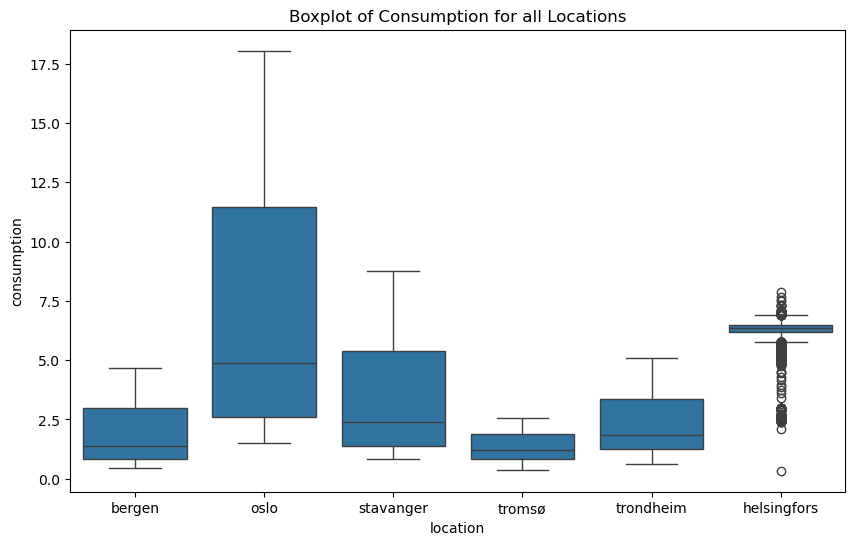

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# For each location
for location in df['location'].unique():
    print("---- Descriptive statistics regarding consumption for ", location)
    df_for_location = df[df['location'] == location]


    # Mean Consumption: The average energy consumption across all locations and timestamps.
    mean_consumption = df_for_location['consumption'].mean()
    print(f'Mean Consumption: {mean_consumption:.2f}')

    # Median Consumption: The middle value of energy consumption to understand central tendency without the influence of outliers.
    median_consumption = df_for_location['consumption'].median()
    print(f'Median Consumption: {median_consumption:.2f}')

    # Mode Consumption: The most frequently occurring value of energy consumption to understand the most common consumption value.
    mode_consumption = df_for_location['consumption'].mode()[0]
    print(f'Mode Consumption: {mode_consumption:.2f}')


    # Standard Deviation: Shows the amount of variation or dispersion of the consumption values.
    std_consumption = df_for_location['consumption'].std()
    print(f'Standard Deviation: {std_consumption:.2f}')

    # Variance: The average of the squared differences from the mean.
    var_consumption = df_for_location['consumption'].var()
    print(f'Variance: {var_consumption:.2f}')

    max_consumption = df_for_location['consumption'].max()
    min_consumption = df_for_location['consumption'].min()
    print(f'Maximum Consumption: {max_consumption:.2f}')
    print(f'Minimum Consumption: {min_consumption:.2f}')

    # Quartiles: Especially the 25th (Q1) and the 75th (Q3) percentiles. They can help understand the spread and can be used to identify outliers.
    # Boxplot for the consumption values to visualize the quartiles.
    q1_consumption = df_for_location['consumption'].quantile(0.25)
    q3_consumption = df_for_location['consumption'].quantile(0.75)
    iqr_consumption = q3_consumption - q1_consumption

    print(f'Q1: {q1_consumption:.2f}')
    print(f'Q3: {q3_consumption:.2f}')
    print(f'IQR: {iqr_consumption:.2f}')

    # Skewness: Indicates whether the data is skewed to larger or smaller values.
    skew_consumption = df_for_location['consumption'].skew()
    print(f'Skewness: {skew_consumption:.2f}')

    # Kurtosis: Indicates the shape of the distribution, whether it's heavy-tailed (lots of outliers) or light-tailed (few outliers) compared to a normal distribution.
    kurt_consumption = df_for_location['consumption'].kurt()
    print(f'Kurtosis: {kurt_consumption:.2f}')

    # Count of Data Points: For each location.
    count_consumption = df_for_location['consumption'].count()
    print(f'Count of Data Points: {count_consumption}')

    # Frequency of Missing Values: If there are any in the dataset.
    freq_missing = df_for_location['consumption'].isnull().sum()
    print(f'Frequency of Missing Values: {freq_missing}')

# For all location, display boxplots for consumption in one plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='consumption', data=df)
plt.title('Boxplot of Consumption for all Locations')
plt.show()


---- Descriptive statistics regarding temperature for  bergen
Mean Temperature: 7.75
Median Temperature: 8.10
Mode Temperature: 11.00
Standard Deviation: 6.56
Variance: 42.99
Maximum Temperature: 29.30
Minimum Temperature: -15.60
Q1: 3.10
Q3: 12.20
IQR: 9.10
Skewness: -0.08
Kurtosis: -0.08
Count of Data Points: 8641
Frequency of Missing Values: 0
---- Descriptive statistics regarding temperature for  oslo
Mean Temperature: 7.39
Median Temperature: 7.90
Mode Temperature: 2.00
Standard Deviation: 8.77
Variance: 76.93
Maximum Temperature: 29.80
Minimum Temperature: -15.40
Q1: 0.90
Q3: 14.20
IQR: 13.30
Skewness: -0.08
Kurtosis: -0.72
Count of Data Points: 8641
Frequency of Missing Values: 0
---- Descriptive statistics regarding temperature for  stavanger
Mean Temperature: 8.55
Median Temperature: 8.90
Mode Temperature: 12.10
Standard Deviation: 5.84
Variance: 34.10
Maximum Temperature: 27.00
Minimum Temperature: -9.20
Q1: 4.30
Q3: 12.70
IQR: 8.40
Skewness: -0.06
Kurtosis: -0.28
Count of Da

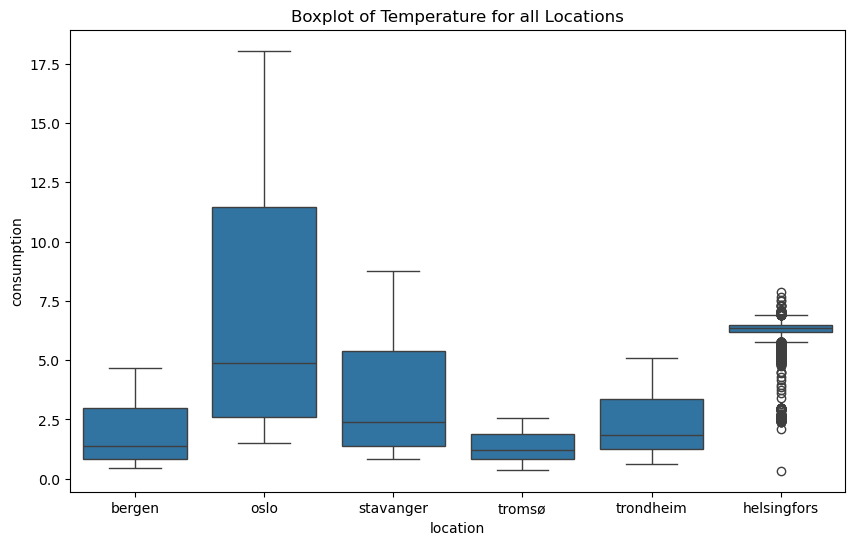

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# For each location
for location in df['location'].unique():
    print("---- Descriptive statistics regarding temperature for ", location)
    df_for_location = df[df['location'] == location]


    # Mean Temperature: The average energy temperature across all locations and timestamps.
    mean_consumption = df_for_location['temperature'].mean()
    print(f'Mean Temperature: {mean_consumption:.2f}')

    # Median Temperature: The middle value of energy temperature to understand central tendency without the influence of outliers.
    median_consumption = df_for_location['temperature'].median()
    print(f'Median Temperature: {median_consumption:.2f}')

    # Mode Temperature: The most frequently occurring value of energy temperature to understand the most common temperature value.
    mode_consumption = df_for_location['temperature'].mode()[0]
    print(f'Mode Temperature: {mode_consumption:.2f}')


    # Standard Deviation: Shows the amount of variation or dispersion of the temperature values.
    std_consumption = df_for_location['temperature'].std()
    print(f'Standard Deviation: {std_consumption:.2f}')

    # Variance: The average of the squared differences from the mean.
    var_consumption = df_for_location['temperature'].var()
    print(f'Variance: {var_consumption:.2f}')

    max_consumption = df_for_location['temperature'].max()
    min_consumption = df_for_location['temperature'].min()
    print(f'Maximum Temperature: {max_consumption:.2f}')
    print(f'Minimum Temperature: {min_consumption:.2f}')

    # Quartiles: Especially the 25th (Q1) and the 75th (Q3) percentiles. They can help understand the spread and can be used to identify outliers.
    # Boxplot for the temperature values to visualize the quartiles.
    q1_consumption = df_for_location['temperature'].quantile(0.25)
    q3_consumption = df_for_location['temperature'].quantile(0.75)
    iqr_consumption = q3_consumption - q1_consumption

    print(f'Q1: {q1_consumption:.2f}')
    print(f'Q3: {q3_consumption:.2f}')
    print(f'IQR: {iqr_consumption:.2f}')

    # Skewness: Indicates whether the data is skewed to larger or smaller values.
    skew_consumption = df_for_location['temperature'].skew()
    print(f'Skewness: {skew_consumption:.2f}')

    # Kurtosis: Indicates the shape of the distribution, whether it's heavy-tailed (lots of outliers) or light-tailed (few outliers) compared to a normal distribution.
    kurt_consumption = df_for_location['temperature'].kurt()
    print(f'Kurtosis: {kurt_consumption:.2f}')

    # Count of Data Points: For each location.
    count_consumption = df_for_location['temperature'].count()
    print(f'Count of Data Points: {count_consumption}')

    # Frequency of Missing Values: If there are any in the dataset.
    freq_missing = df_for_location['temperature'].isnull().sum()
    print(f'Frequency of Missing Values: {freq_missing}')

# For all location, display boxplots for consumption in one plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='consumption', data=df)
plt.title('Boxplot of Temperature for all Locations')
plt.show()
